In [26]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import os
import numpy as np

In [70]:
audio = []
location = 'data'
for root, dirs, files in os.walk(location):
    for file in files:
        print(location+'/'+file)
        audio.append(librosa.load(location+'/'+file))
    

data/FVC-1.wav
data/FVC-2.wav
data/FVC-3.wav
data/FVC-microphone.wav
data/FVCm1.wav
data/FVCm2.wav
data/FVCm3.wav
data/Normal_breathing.wav


In [57]:
# duration in seconds of 1 sample
sample_duration = 1 / audio[0][1]
print(f"One sample lasts for {sample_duration:6f} seconds")
# total number of samples in audio file
tot_samples = len(audio[0][0])
# duration of debussy audio in seconds
duration = 1 / audio[0][1] * tot_samples
print(f"The audio lasts for {duration} seconds")

One sample lasts for 0.000045 seconds
The audio lasts for 7.291065759637188 seconds


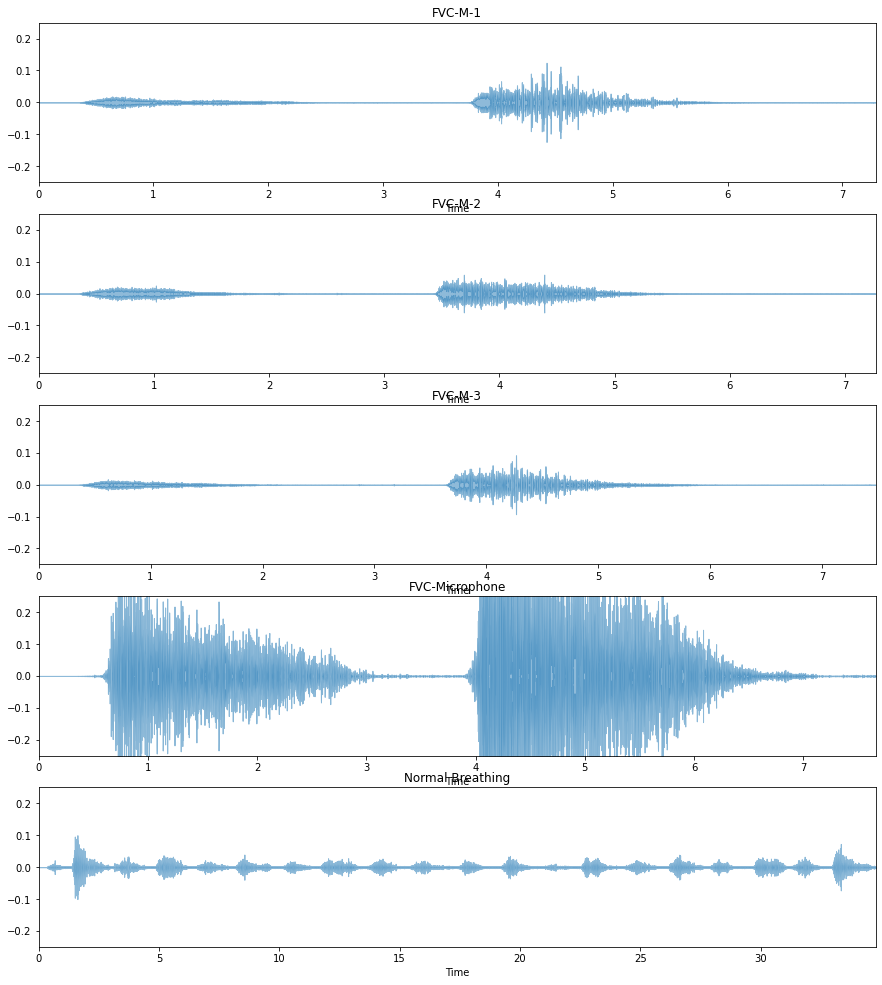

In [59]:
plt.figure(figsize=(15, 17))

plt.subplot(5, 1, 1)
librosa.display.waveplot(audio[0][0], alpha=0.5)
plt.ylim((-0.25, 0.25))
plt.title("FVC-M-1")

plt.subplot(5, 1, 2)
librosa.display.waveplot(audio[1][0], alpha=0.5)
plt.ylim((-0.25, 0.25))
plt.title("FVC-M-2")

plt.subplot(5, 1, 3)
librosa.display.waveplot(audio[2][0], alpha=0.5)
plt.ylim((-0.25, 0.25))
plt.title("FVC-M-3")

plt.subplot(5, 1, 4)
librosa.display.waveplot(audio[3][0], alpha=0.5)
plt.ylim((-0.25, 0.25))
plt.title("FVC-Microphone")

plt.subplot(5, 1, 5)
librosa.display.waveplot(audio[4][0], alpha=0.5)
plt.ylim((-0.25, 0.25))
plt.title("Normal Breathing")

plt.show()

In [31]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length):  # 0 to 511, 512 to 1023, 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [33]:
# number of frames in amplitude envelope
ae_fvc1 = amplitude_envelope(audio[0][0], FRAME_SIZE, HOP_LENGTH)
ae_fvc2 = amplitude_envelope(audio[1][0], FRAME_SIZE, HOP_LENGTH)
ae_fvc3 = amplitude_envelope(audio[2][0], FRAME_SIZE, HOP_LENGTH)

In [40]:
frames_fvc1 = range(len(ae_fvc1))
frames_fvc2 = range(len(ae_fvc2))
frames_fvc3 = range(len(ae_fvc3))

t_fvc1 = librosa.frames_to_time(frames_fvc1, hop_length=HOP_LENGTH)
t_fvc2 = librosa.frames_to_time(frames_fvc2, hop_length=HOP_LENGTH)
t_fvc3 = librosa.frames_to_time(frames_fvc3, hop_length=HOP_LENGTH)

#t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

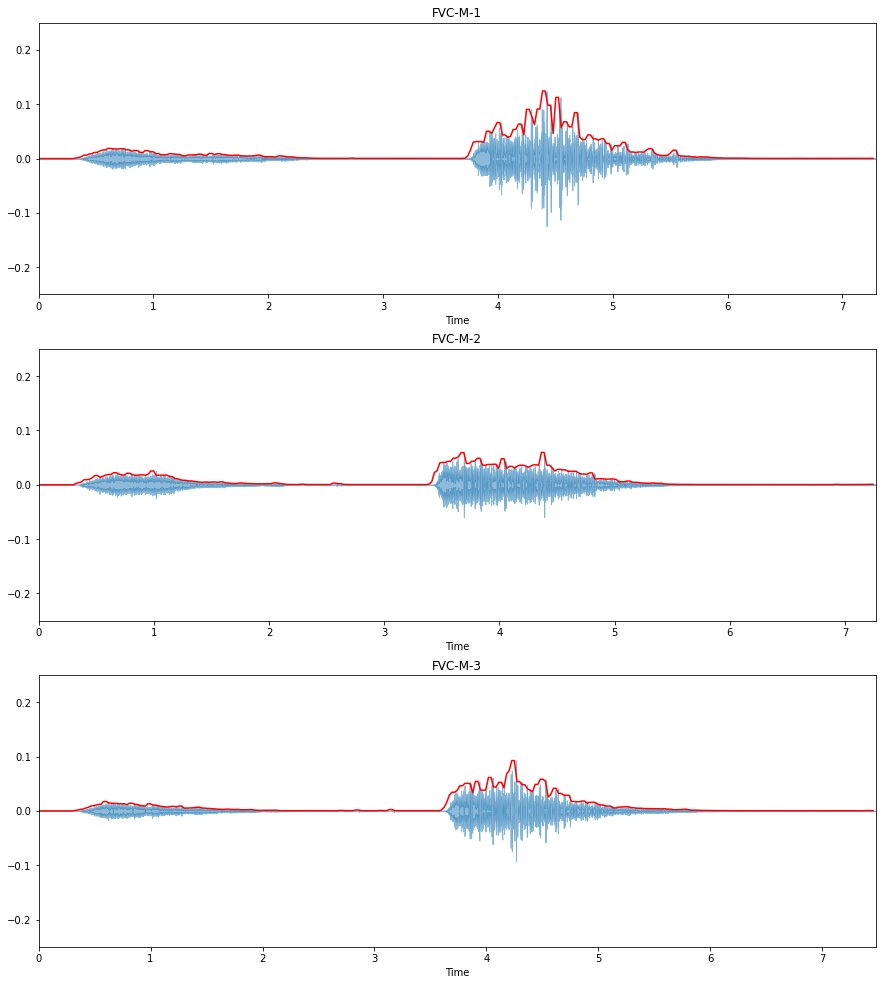

In [43]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(audio[0][0], alpha=0.5)
plt.plot(t_fvc1, ae_fvc1, color="r")
plt.ylim((-0.25, 0.25))
plt.title("FVC-M-1")

plt.subplot(3, 1, 2)
librosa.display.waveplot(audio[1][0], alpha=0.5)
plt.plot(t_fvc2, ae_fvc2, color="r")
plt.ylim((-0.25, 0.25))
plt.title("FVC-M-2")

plt.subplot(3, 1, 3)
librosa.display.waveplot(audio[2][0], alpha=0.5)
plt.plot(t_fvc3, ae_fvc3, color="r")
plt.ylim((-0.25, 0.25))
plt.title("FVC-M-3")

plt.show()

### RMSE Feature

In [46]:
rms_fvc1 = librosa.feature.rms(audio[0][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_fvc2 = librosa.feature.rms(audio[1][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_fvc3 = librosa.feature.rms(audio[2][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [47]:
rms_frames_fvc1 = range(len(rms_fvc1))
rms_frames_fvc2 = range(len(rms_fvc2))
rms_frames_fvc3 = range(len(rms_fvc3))

rms_t_fvc1 = librosa.frames_to_time(rms_frames_fvc1, hop_length=HOP_LENGTH)
rms_t_fvc2 = librosa.frames_to_time(rms_frames_fvc2, hop_length=HOP_LENGTH)
rms_t_fvc3 = librosa.frames_to_time(rms_frames_fvc3, hop_length=HOP_LENGTH)

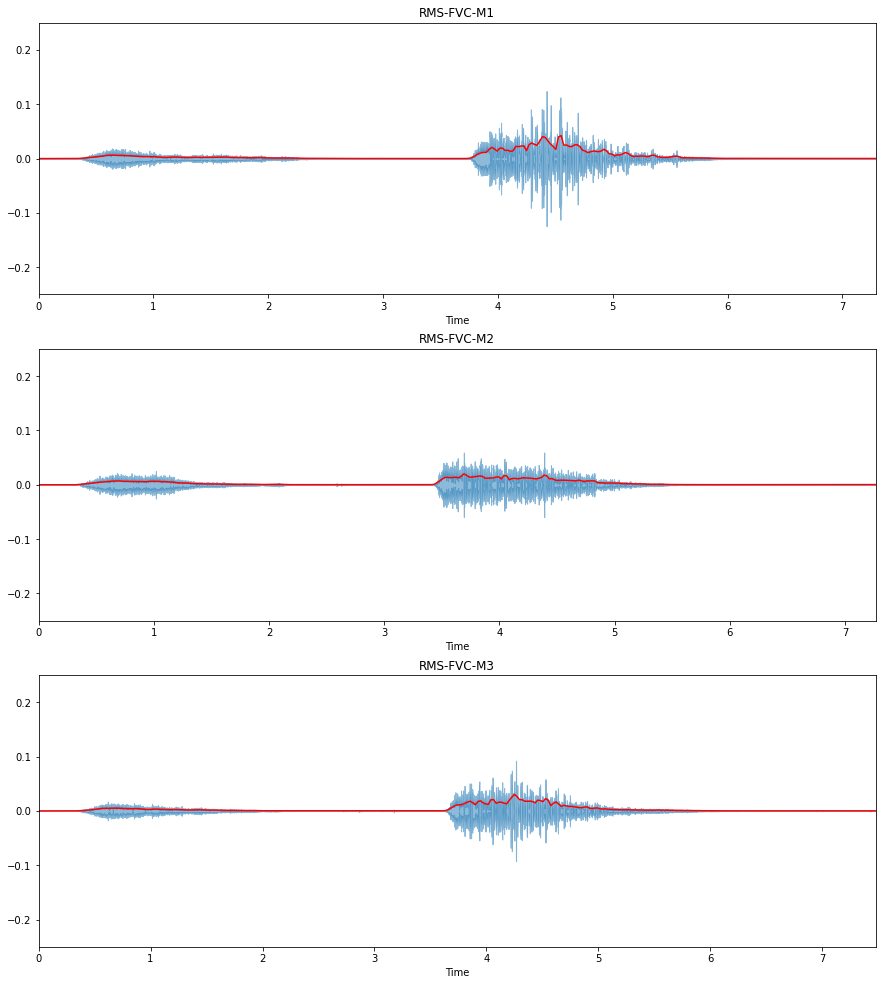

In [48]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(audio[0][0], alpha=0.5)
plt.plot(rms_t_fvc1, rms_fvc1, color="r")
plt.ylim((-0.25, 0.25))
plt.title("RMS-FVC-M1")

plt.subplot(3, 1, 2)
librosa.display.waveplot(audio[1][0], alpha=0.5)
plt.plot(rms_t_fvc2, rms_fvc2, color="r")
plt.ylim((-0.25, 0.25))
plt.title("RMS-FVC-M2")

plt.subplot(3, 1, 3)
librosa.display.waveplot(audio[2][0], alpha=0.5)
plt.plot(rms_t_fvc3, rms_fvc3, color="r")
plt.ylim((-0.25, 0.25))
plt.title("RMS-FVC-M3")

plt.show()

### Zero-crossing rate

In [62]:
zcr_fvc1 = librosa.feature.zero_crossing_rate(audio[3][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_fvc2 = librosa.feature.zero_crossing_rate(audio[4][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_fvc3 = librosa.feature.zero_crossing_rate(audio[5][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_fvcm = librosa.feature.zero_crossing_rate(audio[6][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_nm = librosa.feature.zero_crossing_rate(audio[7][0], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

zcr_frames_fvc1 = range(len(zcr_fvc1))
zcr_frames_fvc2 = range(len(zcr_fvc2))
zcr_frames_fvc3 = range(len(zcr_fvc3))
zcr_frames_fvcm = range(len(zcr_fvcm))
zcr_frames_nm = range(len(zcr_nm))

zcr_t_fvc1 = librosa.frames_to_time(zcr_frames_fvc1, hop_length=HOP_LENGTH)
zcr_t_fvc2 = librosa.frames_to_time(zcr_frames_fvc2, hop_length=HOP_LENGTH)
zcr_t_fvc3 = librosa.frames_to_time(zcr_frames_fvc3, hop_length=HOP_LENGTH)
zcr_t_fvcm = librosa.frames_to_time(zcr_frames_fvcm, hop_length=HOP_LENGTH)
zcr_t_nm = librosa.frames_to_time(zcr_frames_nm, hop_length=HOP_LENGTH)

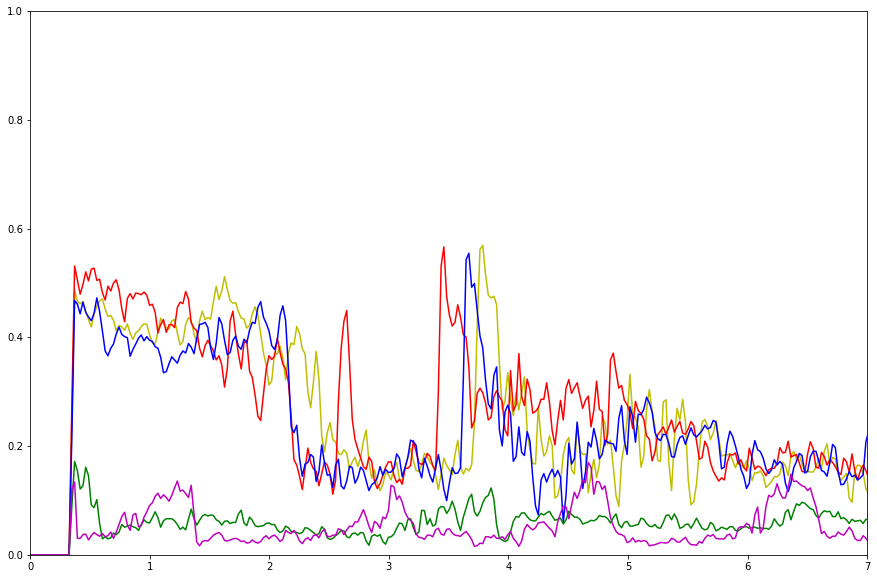

In [69]:
plt.figure(figsize=(15, 10))

plt.plot(zcr_t_fvc1, zcr_fvc1, color="y")
plt.plot(zcr_t_fvc2, zcr_fvc2, color="r")
plt.plot(zcr_t_fvc3, zcr_fvc3, color="b")
plt.plot(zcr_t_fvcm, zcr_fvcm, color="g")
plt.plot(zcr_t_nm, zcr_nm, color="m")
plt.ylim(0, 1)
plt.xlim(0,7)
plt.show()